In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
_df = pd.read_json('news_data.json', lines = True)
df = _df.drop(_df.columns[[0,4,5]], axis = 1)

In [3]:
df

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...
...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr..."
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...


In [4]:
target_category = df['category'].unique()
print(target_category)

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


## From Object to text

In [5]:
df['category'] = df['category'].astype('string')
df['headline'] = df['headline'].astype('string')
df['short_description'] = df['short_description'].astype('string')

In [6]:
# category = df[['category', 'categoryId']].drop_duplicates().sort_values('categoryId')
# category.head()

In [7]:
df[df['category']== 'impact'].iloc[34:50]

,headline,category,short_description


In [8]:
df['category'].iloc[0:5]
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

### To lower

In [9]:
df['headline'] = df['headline'].str.lower()
df['category'] = df['category'].str.lower()
df['short_description'] = df['short_description'].str.lower()


# Merging similar classes

In [10]:
for index, row in df.iterrows():
    i = df['category'].at[index]
    
    if(i == "world news"):
        df['category'].at[index] = "worldpost" 
        
 
    if( i=="ARTS"):
        df['category'].at[index] = "arts & culture"
        
    if( i=="wellness"):
        df['category'].at[index] = "healthy living"
    
    if( i=="taste"):
        df['category'].at[index] = "food & drink"
   
    if( i=="parenting"):
        df['category'].at[index] = "parents"
   


# Removing useless words

In [11]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.tokenize import sent_tokenize
# print(stopwords.words('english'))

def remove_stopword(text):
    stop_word = set(stopwords.words('english'))
#     words = word_tokenize(text)
    return  " ".join([x for x in text.split() if x not in stop_word])


df['headline'] = df['headline'].apply(remove_stopword)
df['short_description'] = df['short_description'].apply(remove_stopword)


In [12]:
def special_char(text):
    reviews = ''
    
    for x in text:
        if(x == " "):
            reviews += " "
            
        elif(x.isalnum()):
            reviews += x
            
    return reviews

df['headline'] = df['headline'].apply(special_char)
df['short_description'] = df['short_description'].apply(special_char)


## To vectorize document

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


## min_df halves at min values does not give more than half df_min -> infrequent , max -> common
vec_head = TfidfVectorizer(min_df=0.000011,max_df = 0.00012, lowercase=False ,  dtype=np.float32)
vec_desc = TfidfVectorizer(min_df=0.000011,max_df = 0.00004, lowercase=False,   dtype=np.float32)


# vec_head = TfidfVectorizer( lowercase=False ,  dtype=np.float32)
# vec_desc = TfidfVectorizer( lowercase=False,   dtype=np.float32)


x_head =  vec_head.fit_transform(df['headline'])
x_desc = vec_desc.fit_transform(df['short_description']) 


x_head.sort_indices()
x_desc.sort_indices()

# x_head = x_head.toarray()
# x_desc = x_desc.toarray()

# print("First row avaliable words")
# print((x_head[0,0:]))
x_head.shape


(209527, 21571)

In [14]:
print("Words: keys")
# vec.get_feature_names_out()
# vec.vocabulary_

Words: keys


In [15]:
def to_categorical(y, num_classes = None, dtype="float32"):
    y = np.array(y, dtype="int")
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

## Category Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

# from tensorflow.keras.utils import np_utils
# from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit(df["category"])
label = labelEncode

labelEncode = le.fit_transform(df["category"])

print("LabelEncode")
print(labelEncode)

categorical_y = to_categorical(labelEncode)
print("\n To_Categorical one hot encode")
print(categorical_y)

LabelEncode
[33 33  5 ... 27 27 27]

 To_Categorical one hot encode
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
label.classes_

array(['arts', 'arts & culture', 'black voices', 'business', 'college',
       'comedy', 'crime', 'culture & arts', 'divorce', 'education',
       'entertainment', 'environment', 'fifty', 'food & drink',
       'good news', 'green', 'healthy living', 'home & living', 'impact',
       'latino voices', 'media', 'money', 'parents', 'politics',
       'queer voices', 'religion', 'science', 'sports', 'style',
       'style & beauty', 'tech', 'the worldpost', 'travel', 'u.s. news',
       'weddings', 'weird news', 'women', 'worldpost'], dtype=object)

### Healine Split

In [18]:
x_head

<209527x21571 sparse matrix of type '<class 'numpy.float32'>'
	with 177626 stored elements in Compressed Sparse Row format>

In [139]:
from sklearn.model_selection import train_test_split

x_train_head, x_test_head, y_train_head, y_test_head = train_test_split(x_head, categorical_y, test_size = 0.1, random_state = 2, stratify = categorical_y)
print(x_train_head.shape[0])
print(x_test_head.shape[0])
print(categorical_y)

# print("First row sorted word map")
# print(x[0,0:])

188574
20953
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Description Split

In [140]:
from sklearn.model_selection import train_test_split

x_train_desc, x_test_desc, y_train_desc, y_test_desc = train_test_split(x_desc, categorical_y, test_size = 0.1, random_state = 2, stratify = categorical_y)
print(x_train_desc.shape[0])
print(x_test_desc.shape[0])
print(categorical_y)

# print("First row sorted word map")
# print(x[0,0:])

188574
20953
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Validating Random state

In [125]:
y_train_head[23]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [126]:
y_train_desc[23]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [127]:
# x_train_head2 = np.array(x_train_head.toarray(),dtype = 'float16')

y_train_desc.shape

(188574, 38)

## Merging the diff splits

In [128]:
# import tensorflow as tf
# from tensorflow import convert_to_tensor

# y_train_head= tf.convert_to_tensor(y_train_head)
# y_test_head= tf.convert_to_tensor(y_test_head)

# x_train_head= tf.convert_to_tensor(x_train_head.todense())
# x_test_head= tf.convert_to_tensor(x_test_head.todense())

In [129]:
# y_train_desc= tf.convert_to_tensor(y_train_desc)
# y_test_desc= tf.convert_to_tensor(y_test_desc)

# x_train_desc = tf.convert_to_tensor(x_train_desc.todense())
# x_test_desc = tf.convert_to_tensor(x_test_desc.todense())

In [130]:
# from scipy.sparse import coo_matrix, hstack

# x_train = hstack([x_train_head,x_train_desc])
# x_test = hstack([x_test_head, x_test_desc])



## sparse to tensor

In [131]:
import tensorflow as tf 


from tensorflow.python.eager.def_function import experimental_run_functions_eagerly
from keras.models import Sequential
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf 
# import tensorflow_ranking as tfr
import keras

# validation splits


In [132]:
x_train_head, x_val_head, y_train_head, y_val_head = train_test_split(x_train_head, y_train_head, test_size = 0.1, random_state = 2, stratify = y_train_head)

x_train_desc, x_val_desc, y_train_desc, y_val_desc = train_test_split(x_train_desc, y_train_desc, test_size = 0.1, random_state = 2, stratify = y_train_desc)

class_weights = generate_class_weights(categorical_y)

In [133]:
# print(y_val_desc[9])
# print(y_val_head[9])

## Multi input model

In [193]:
head_input = keras.Input(
    shape=(x_train_head.shape[1],), name="headline"
)  

head = Dense(units=124,activation="relu")(head_input)

# head = Dense(units=1140,activation="relu")(head)
# head = Dense(units=140,activation="relu")(head)

#-----------

desc_input = keras.Input(
    shape=(x_train_desc.shape[1],), name="description"
)  
desc = Dense(units=124,activation="relu")(desc_input)
# desc = Dense(units=40,activation="relu")(desc)
#----------- concat
x = layers.concatenate([head,desc])

x = Dense(units=124,activation="relu")(x)


# x = layers.Dense(
#     units=64,
#     kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.L2(1e-4),
#     activity_regularizer=regularizers.L2(1e-5)
# )(x)


# x  = (Dense(units=124,activation="relu"))(x)
output = (Dense(units=y_train_head.shape[1], activation="softmax"))(x)


#-------
model = keras.Model(inputs = [head_input,desc_input],outputs = output)



#----------------compile

optimizer = Adam(learning_rate=0.01)

pre= tf.keras.metrics.Precision( thresholds = 0.5)
recall = tf.keras.metrics.Recall(thresholds = 0.5)
auc = tf.keras.metrics.AUC(label_weights=True)
tf.keras.metrics.CategoricalAccuracy()


cce = tf.keras.losses.CategoricalCrossentropy() #not softmax aka normalized
# sce = tfr.keras.losses.SigmoidCrossEntropyLoss()
# 'from_logits=True'


model.compile(optimizer=optimizer,loss=cce)

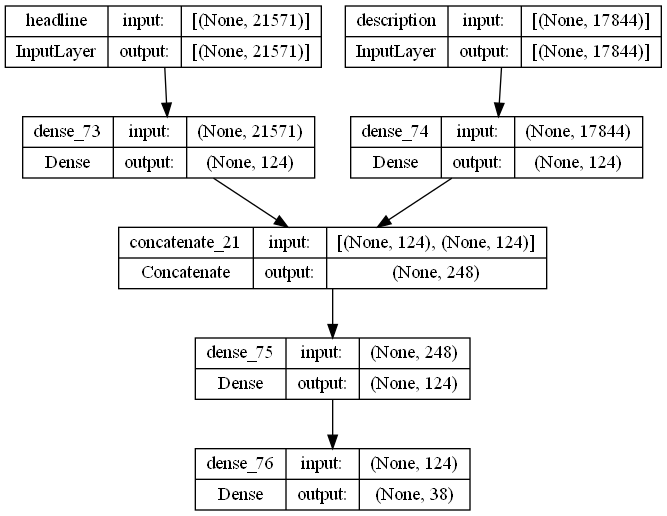

In [194]:
ann_model = model
plot_model(model,show_shapes=True)
# model.summary()

In [195]:
ann_history = ann_model.fit(x = [ x_train_head, x_train_desc], y =  y_train_head ,
                        epochs=15,
                        batch_size=50,
#                         verbose=1,
#                         validation_data = ([x_val_head,x_val_desc],y_val_head),
                        class_weight = class_weights 
                           )

Epoch 1/15


C:\Users\ALI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_21/dense_73/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_21/dense_73/embedding_lookup_sparse/Reshape:0", shape=(None, 124), dtype=float32), dense_shape=Tensor("gradient_tape/model_21/dense_73/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
C:\Users\ALI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_21/dense_74/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_21/dense_74/embedding_lookup_sparse/Reshape:0", shape=(None, 124), dtyp

3772/3772 [==============================] - 190s 50ms/step - loss: 3.5764
Epoch 2/15
3772/3772 [==============================] - 200s 53ms/step - loss: 3.3253
Epoch 3/15
3772/3772 [==============================] - 186s 49ms/step - loss: 3.1212
Epoch 4/15
3772/3772 [==============================] - 184s 49ms/step - loss: 2.9783
Epoch 5/15
3772/3772 [==============================] - 184s 49ms/step - loss: 2.8790
Epoch 6/15
3772/3772 [==============================] - 185s 49ms/step - loss: 2.8066
Epoch 7/15
3772/3772 [==============================] - 184s 49ms/step - loss: 2.7552
Epoch 8/15
3772/3772 [==============================] - 185s 49ms/step - loss: 2.7095
Epoch 9/15
3772/3772 [==============================] - 184s 49ms/step - loss: 2.6740
Epoch 10/15
3772/3772 [==============================] - 182s 48ms/step - loss: 2.6448
Epoch 11/15
3772/3772 [==============================] - 195s 51ms/step - loss: 2.6194
Epoch 12/15
3772/3772 [==============================] - 193s 5

In [ ]:
# from matplotlib import pyplot as plt


# plt.plot(ann_history.history['recall_9'])
# plt.plot(ann_history.history['val_recall_9'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()


# pd.DataFrame(history.history).plot(figsize=(8,5))
# plt.show()

### Description algorithm

# User Made Predictions


In [137]:
data_head = vec_head.transform(["Black people are killing people"]).toarray()
data_desc = vec_desc.transform(["Couple of males killed a boy in black neighbour"]).toarray

data = [data_head,data_desc]

In [ ]:
data[0]

In [ ]:
pred= annModel.predict(data)

In [ ]:
# pred.index(max(pred)) for simple array'
temp = pred.argmax()

print(np.amax(pred))
print(pred.argmax())
print(le.inverse_transform([pred.argmax()]))

## Evaluation

In [143]:
x_test_desc.shape


(20953, 17844)

In [185]:
y_pred_test_cont = ann_model.predict([x_test_head,x_test_desc])
y_pred_train_cont = ann_model.predict([x_train_head,x_train_desc])

5893/5893 [==============================] - 7s 1ms/step


In [186]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score# bin_classif = cont_to_bin(ypred)

# to binary
y_pred_test_bin = cont_to_bin(y_pred_test_cont)
y_pred_train_bin = cont_to_bin(y_pred_train_cont)


# inverse count vector
# y_test_desc = vec_desc.inverse_transform(y_test_desc)
# x_test_head = vec_head.inverse_transform(x_test_head)

# y_pred_train = vec.inverse_transform(y_pred_train_count)
# y_pred_test = vec.inverse_transform(y_pred_test_count)

score_test = f1_score(y_test_head, y_pred_test_bin,average = 'weighted')
score_train = f1_score(y_train_head, y_pred_train_bin,average = 'weighted')

print("Weighted F1-Score: ", score_test)
print("Train Weighted F1-Score: ", score_train)

Weighted F1-Score:  0.22594376924955165
Train Weighted F1-Score:  0.5102155579448235


## Eval metric

In [ ]:
type(x_test_desc)

_test_head = x_test_head.toarray()
_test_desc = x_test_desc.toarray()



In [ ]:
_test_desc.shape

In [ ]:
annModel.input_shape

In [ ]:
test_loss, test_acc, test_precision, test_recall = annModel.evaluate(x = [_test_head, _test_desc], y= y_test_head)

In [ ]:
y_pred = annModel.predict([_test_head, _test_desc])

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import coverage_error,label_ranking_average_precision_score
coverage_error(y_test_desc, y_pred)

In [ ]:
coverage_error(y_test_head, y_pred)

In [ ]:
from sklearn.metrics import label_ranking_average_precision_score

#1/x
##gives ranking by if first = 1, 2nd = 0.5, 3rd = 0.33, 4th= 0.25, 5th = 0.2, 6th = 0.166 did not = 0
label_ranking_average_precision_score(y_test_desc, y_pred )

In [ ]:
label_ranking_average_precision_score(y_test_head, y_pred )

# Multi label Confusion Matrix

In [ ]:
Y_pred = np.argmax(ann_model.predict(x_test_head),axis=1)


In [ ]:
# Y_pred
print(Y_pred[1])
y_pred[1]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix



multilabel_confusion_matrix(y_test_head, Y_pred)

In [ ]:
import numpy as np
from sklearn.metrics import label_ranking_average_precision_score
y_true = np.array([[0, 0, 0,0,0,0,0,0,1]])
y_score = np.array([[0.2, 0.2, 0.2,0.5,0,0,0,0.2,0.1]])
label_ranking_average_precision_score(y_true, y_score)

In [ ]:
Precision = precision_score(y_test_desc, y_pred, average = None)
Recall = recall_score(y_test_desc, y_pred, average= None)
score = f1_score(y_test, y_pred_test,average = None)


data = {'Category':label.classes_,'Recall':Recall,'Precision':Precision,'F1':score}

eval_df = pd.DataFrame(data)

eval_df

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix



conf_mat = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(38,38))

sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=label.classes_, 
            yticklabels=label.classes_)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX \n", size=16);

In [30]:
def cont_to_bin(_2darr):
    #make an 2d array
    final2d = np.empty(_2darr.shape,dtype = int)
    
    #iterate over each row
    for i in range(0,_2darr.shape[0]):
        #find greatest element
        row = _2darr[i]
        index = row.argmax()
        
        #make an array
        temp = np.zeros( row.size )
        temp[index] = 1
        final2d[i] = temp
        
    return final2d

# bin_classif = cont_to_bin(ypred_2)
# np.apply_along_axis(function, 1, array)


In [ ]:
def cont_to_bin(_2darr):
    #make an 2d array
    final2d = np.empty(_2darr.shape,dtype = int)
    
    #iterate over each row
    for i in range(0,_2darr.shape[0]):
        #find greatest element
        row = _2darr[i]
        
        for j in range(0,row.shape[0]):
            if(j )
        
        #make an array
        temp = np.zeros( row.size )
        temp[index] = 1
        final2d[i] = temp
        
    return final2d

# bin_classif = cont_to_bin(ypred_2)
# np.apply_along_axis(function, 1, array)


In [29]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer


def generate_class_weights(class_series, multi_class=True, one_hot_encoded=True):
    if multi_class:
        # If class is one hot encoded, transform to categorical labels to use compute_class_weight   
        if one_hot_encoded:
            class_series = np.argmax(class_series, axis=1)

        # Compute class weights with sklearn method
        class_labels = np.unique(class_series)
        class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
        return dict(zip(class_labels, class_weights))
    else:
        # It is neccessary that the multi-label values are one-hot encoded
        mlb = None
        if not one_hot_encoded:
            mlb = MultiLabelBinarizer()
            class_series = mlb.fit_transform(class_series)

        n_samples = len(class_series)
        n_classes = len(class_series[0])

        # Count each class frequency
        class_count = [0] * n_classes
        for classes in class_series:
            for index in range(n_classes):
                if classes[index] != 0:
                    class_count[index] += 1

        # Compute class weights using balanced method
        class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
        class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
        return dict(zip(class_labels, class_weights))